## II. Programming

### 1)

In [22]:
import warnings
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.feature_selection import f_classif

warnings.filterwarnings("ignore", category=FutureWarning) # Ignore FutureWarnings

# Load data from 'column_diagnosis.arff' into a DataFrame

data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])

# Separate features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']
y = y.astype(str)

# Compute feature importance using F-Score
fimportance = f_classif(X, y)

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'F-Score': fimportance[0]})

index_of_highest_fscore = feature_importance_df['F-Score'].idxmax()
index_of_lowest_fscore = feature_importance_df['F-Score'].idxmin()

highest_feature = feature_importance_df.iloc[index_of_highest_fscore]
lowest_feature = feature_importance_df.iloc[index_of_lowest_fscore]

# Print the feature with the highest and lowest F-Score
print("Feature with Highest F-Score:")
print(highest_feature)

print("\nFeature with Lowest F-Score:")
print(lowest_feature)

Feature with Highest F-Score:
Feature    degree_spondylolisthesis
F-Score                  119.122881
Name: 5, dtype: object

Feature with Lowest F-Score:
Feature    pelvic_radius
F-Score        16.866935
Name: 4, dtype: object


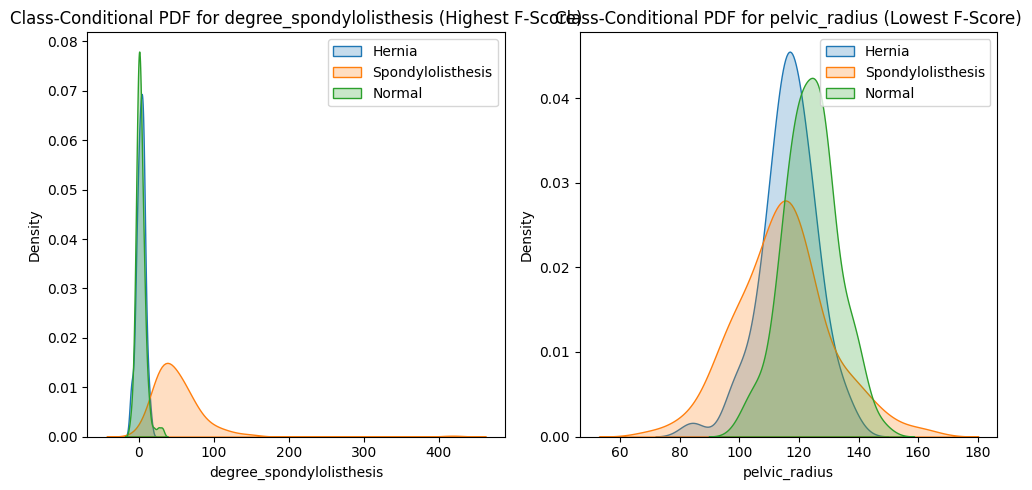

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

highest_feature_name = highest_feature['Feature']
lowest_feature_name = lowest_feature['Feature']

plt.figure(figsize=(10, 5))

# Plot for the feature with the highest F-Score
plt.subplot(1, 2, 1)
for class_label in df['class'].unique():
    sns.kdeplot(data=df[df['class'] == class_label], x=highest_feature_name, label=class_label.decode('utf-8'),  fill = True)
plt.title(f'Class-Conditional PDF for {highest_feature_name} (Highest F-Score)')
plt.legend()

# Plot for the feature with the lowest F-Score
plt.subplot(1, 2, 2)
for class_label in df['class'].unique():
    sns.kdeplot(data=df[df['class'] == class_label], x=lowest_feature_name, label=class_label.decode('utf-8'), fill = True)
plt.title(f'Class-Conditional PDF for {lowest_feature_name} (Lowest F-Score)')
plt.legend()

plt.tight_layout()
plt.show()

### 2)

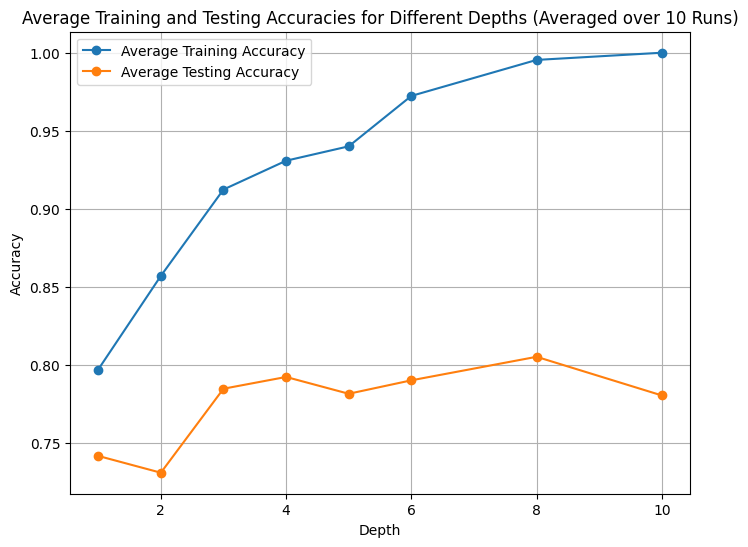

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import tree, metrics

depths = [1, 2, 3, 4, 5, 6, 8, 10]
num_runs = 10

average_train_accuracies = []
average_test_accuracies = []

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

for depth in depths:
    # List to store  accuracies for each run
    train_accuracies = []
    test_accuracies = []
    for _ in range(num_runs):
        # Create a decision tree classifier with the specified depth
        predictor = tree.DecisionTreeClassifier(max_depth=depth, random_state=_)
        predictor.fit(X_train, y_train)

        # Training Accuracy
        y_train_pred = predictor.predict(X_train)
        train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
        train_accuracies.append(train_accuracy)

        # Testing Accuracy
        y_test_pred = predictor.predict(X_test)
        test_accuracy = metrics.accuracy_score(y_test, y_test_pred)
        test_accuracies.append(test_accuracy)
    
    # Calculate and store the average accuracies for the current depth
    average_train_accuracy = sum(train_accuracies) / num_runs
    average_train_accuracies.append(average_train_accuracy)
    
    average_test_accuracy = sum(test_accuracies) / num_runs
    average_test_accuracies.append(average_test_accuracy)

# Create the line plot
plt.figure(figsize=(8, 6))
plt.plot(depths, average_train_accuracies, label='Average Training Accuracy', marker='o')
plt.plot(depths, average_test_accuracies, label='Average Testing Accuracy', marker='o')

plt.title('Average Training and Testing Accuracies for Different Depths (Averaged over 10 Runs)')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

### 3)

##### Generalization capacity across diferent settings is poor, as the average testing accuracy is lower than the training accuracy. Overfitting becomes more pronounced with increasing maximum depth, as evidenced by the widening gap between the training and testing accuracy lines. This suggests that the model is learning complex patterns in the training data that do not generalize well to new data. Despite having lower training accuracy, shallower models produce the best testing results.

### 4)

#### i)

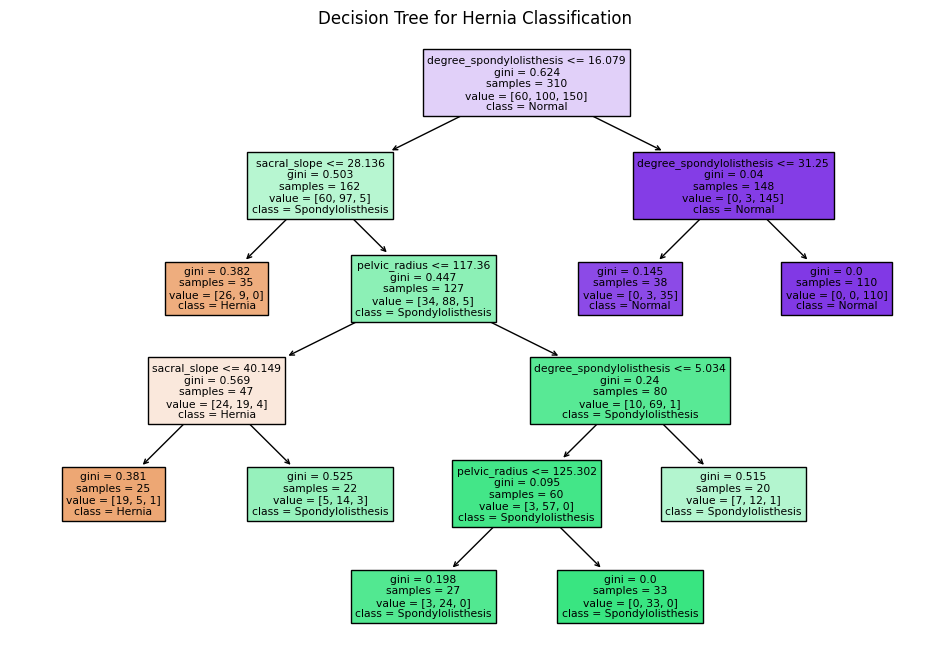

In [25]:
from sklearn.tree import plot_tree

decision_tree = tree.DecisionTreeClassifier(random_state=0, min_samples_leaf=20)

decision_tree.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=y.unique())
plt.title("Decision Tree for Hernia Classification")
plt.show()

#### ii)

By analyzing the Decision Tree we can see that the biomechanical features that best predict the condition of hernia are:
1. Degree of spondylolisthesis
2. Sacral slope
3. Pelvic radius

Starting from the root node we see that a Degree of spondylolisthesis greater than 16 will classify the patient as normal.
If lower, we look at the Sacral slope that if lesser than 28 also classifies the patient as having the hernia condition.
Only then will we look at the Pelvic radius, that if lesser than 117 and in combination with a sacral slope lesser than 440 leads to a hernia condition.

Therefore the conditional associations are the following:
- Degree of spondylolisthesis <= 16.079 -> sacral slope <= 28.136
- Degree of spondylolisthesis <= 16.079 -> sacral slope > 28.136 -> pelvic radius <= 117.36 -> sacral slope <= 40.149

We can conclude that the empirical probability of being diagnosed with a hernia condition is [(25+35)/310]x100 = 19%.